## Lab 2 Deep Learning
Stefano Aragoni, Carol Arevalo

In [166]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization


In [167]:
#Load data into DatraFrame
df = pd.read_csv('movie_statistic_dataset.csv')

#Print the first 5 rows of the DataFrame
df.head()


,movie_title,production_date,genres,runtime_minutes,director_name,director_professions,director_birthYear,director_deathYear,movie_averageRating,movie_numerOfVotes,approval_Index,Production budget $,Domestic gross $,Worldwide gross $
0,Avatar: The Way of Water,2022-12-09,"Action,Adventure,Fantasy",192.0,James Cameron,"writer,producer,director",1954,alive,7.8,277543.0,7.061101,460000000,667830256,2265935552
1,Avengers: Endgame,2019-04-23,"Action,Adventure,Drama",181.0,-,-,-,-,8.4,1143642.0,8.489533,400000000,858373000,2794731755
2,Pirates of the Caribbean: On Stranger Tides,2011-05-20,"Action,Adventure,Fantasy",137.0,Rob Marshall,"director,miscellaneous,producer",1960,alive,6.6,533763.0,6.272064,379000000,241071802,1045713802
3,Avengers: Age of Ultron,2015-04-22,"Action,Adventure,Sci-Fi",141.0,Joss Whedon,"writer,producer,director",1964,alive,7.3,870573.0,7.214013,365000000,459005868,1395316979
4,Avengers: Infinity War,2018-04-25,"Action,Adventure,Sci-Fi",149.0,-,-,-,-,8.4,1091968.0,8.460958,300000000,678815482,2048359754


<Axes: >

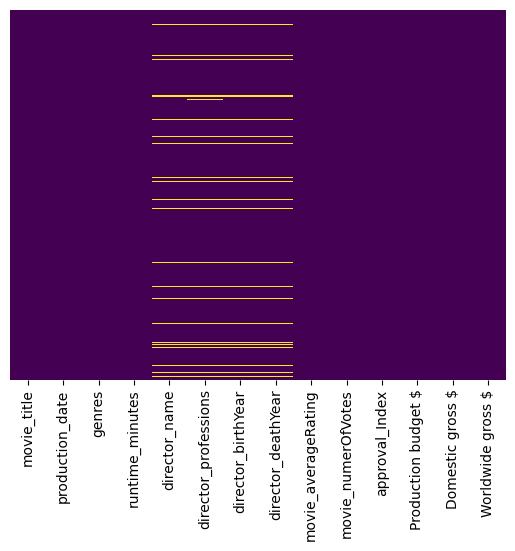

In [168]:
#para todos los ? los cambiamos por NaN
df.replace('-', np.nan, inplace=True)
df.isnull()

sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')


<Axes: >

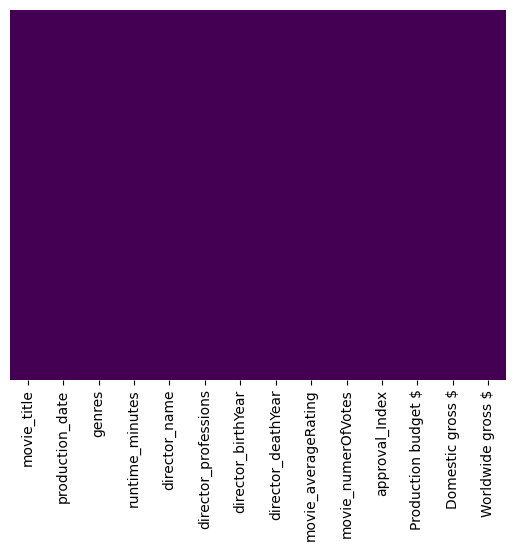

In [169]:

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].mean())

sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')


In [170]:
# quitar columanas inecesarias de la tabla
df.drop(["director_professions", "director_birthYear", "director_deathYear", "movie_title"], axis=1, inplace=True)

encoder = LabelEncoder()
df['director_encoded'] = encoder.fit_transform(df['director_name'])
df.drop(["director_name"], axis=1, inplace=True)

df['genres_encoded'] = encoder.fit_transform(df['genres'])
df.drop(["genres"], axis=1, inplace=True)

#cambiar columna de fecha a numerica
df['production_date'] = pd.to_datetime(df['production_date'])
df['production_year'] = df['production_date'].dt.year
df.drop(["production_date"], axis=1, inplace=True)

df.head(5)


,runtime_minutes,movie_averageRating,movie_numerOfVotes,approval_Index,Production budget $,Domestic gross $,Worldwide gross $,director_encoded,genres_encoded,production_year
0,192.0,7.8,277543.0,7.061101,460000000,667830256,2265935552,664,8,2022
1,181.0,8.4,1143642.0,8.489533,400000000,858373000,2794731755,1646,6,2019
2,137.0,6.6,533763.0,6.272064,379000000,241071802,1045713802,1445,8,2011
3,141.0,7.3,870573.0,7.214013,365000000,459005868,1395316979,899,13,2015
4,149.0,8.4,1091968.0,8.460958,300000000,678815482,2048359754,1646,13,2018


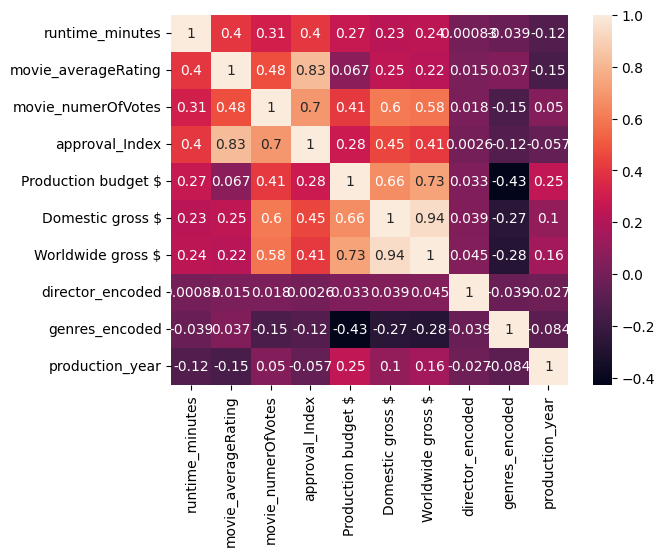

In [171]:
#matriz de corelacion
sns.heatmap(df.corr(), annot=True)
plt.show()

In [172]:
# Escoger variables
# df.drop



# Preprocess the data
y = df[['Worldwide gross $']].values
X = df.drop(['Worldwide gross $'], axis=1).values

# Normalize the features 
scaler = StandardScaler()
X = scaler.fit_transform(X)


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [173]:
batched_model = Sequential([
    Dense(64, input_shape=(9,), activation="relu"),
    BatchNormalization(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dense(1, activation='softmax')
]);

In [174]:
batched_model.compile(
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

In [175]:
batched_history =  batched_model.fit(
    X_train, 
    y_train, 
    epochs=200, 
    validation_split=0.25, 
    batch_size=40, 
    verbose=2
)

Epoch 1/200


c:\Users\carev\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow\python\util\dispatch.py:1176: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


66/66 - 3s - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - 3s/epoch - 41ms/step
Epoch 2/200
66/66 - 0s - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - 213ms/epoch - 3ms/step
Epoch 3/200
66/66 - 0s - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - 162ms/epoch - 2ms/step
Epoch 4/200
66/66 - 0s - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - 165ms/epoch - 2ms/step
Epoch 5/200
66/66 - 0s - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - 179ms/epoch - 3ms/step
Epoch 6/200
66/66 - 0s - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - 160ms/epoch - 2ms/step
Epoch 7/200
66/66 - 0s - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - 167ms/epoch - 3ms/step
Epoch 8/200
66/66 - 0s - loss: 0.0